<h1 align = "center">End-to-end Machine Learning Pipeline</h1>
<p align = "center">A Study with Californian House Prices</p>

<h2>Set up</h2>

In [1]:
# The following code asserts if the current
# of python we are running is suitable.
import sys
assert sys.version_info >= (3,5)

# Now assert the version of the SciKit Learn library.
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# Common imports
import numpy as np
import os

In [3]:
# Configure MatPlotLib library.

# Resulting plots will be saved and displayed to the Jupyter Notebook.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# Set configuration of mpl via rcParams.
mpl.rc("axes", labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

In [4]:
# Directory setup for produced plots.
PROJECT_ROOT_DIR = "."
IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "plots")

In [5]:
# Invoke the OS' command to create a directory for plots.
# exist_ok flag checks id the directory already exists before creating it.
os.makedirs(IMG_PATH, exist_ok = True)

In [6]:
# Define a function which sabes plots to our images directory.
def save_fig(id, tight_layout = True, extension = "png", res = 300):
    path = os.path.join(IMG_PATH, id + "." + extension)
    print("Saving figure {}".format(id))
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path, format = extension, dpi = res)

<h2>Data Acquisition</h2>

In [7]:
# Imports for downloading and reading data.
import tarfile as tf
import urllib.request
import pandas as pd

In [8]:
# Establish directories for data acquisition and saving.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [9]:
# Define a function which fetches housing data for analysis.
def fetch_housing_data(url = HOUSING_URL, path = HOUSING_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    
    tgz_path = os.path.join(path, "housing.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tf.open(tgz_path)
    housing_tgz.extractall(path)
    housing_tgz.close()

In [10]:
# Fetch the data using our function.
fetch_housing_data()

In [11]:
# Define a function for reading the fetched data it a Pandas dataframe.
def load_housing_data(path = HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)


<h2>Data Analysis</h2>

In [12]:
# Read data into dataframe.
df_housing = load_housing_data()

In [14]:
# Read head of dataset.
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


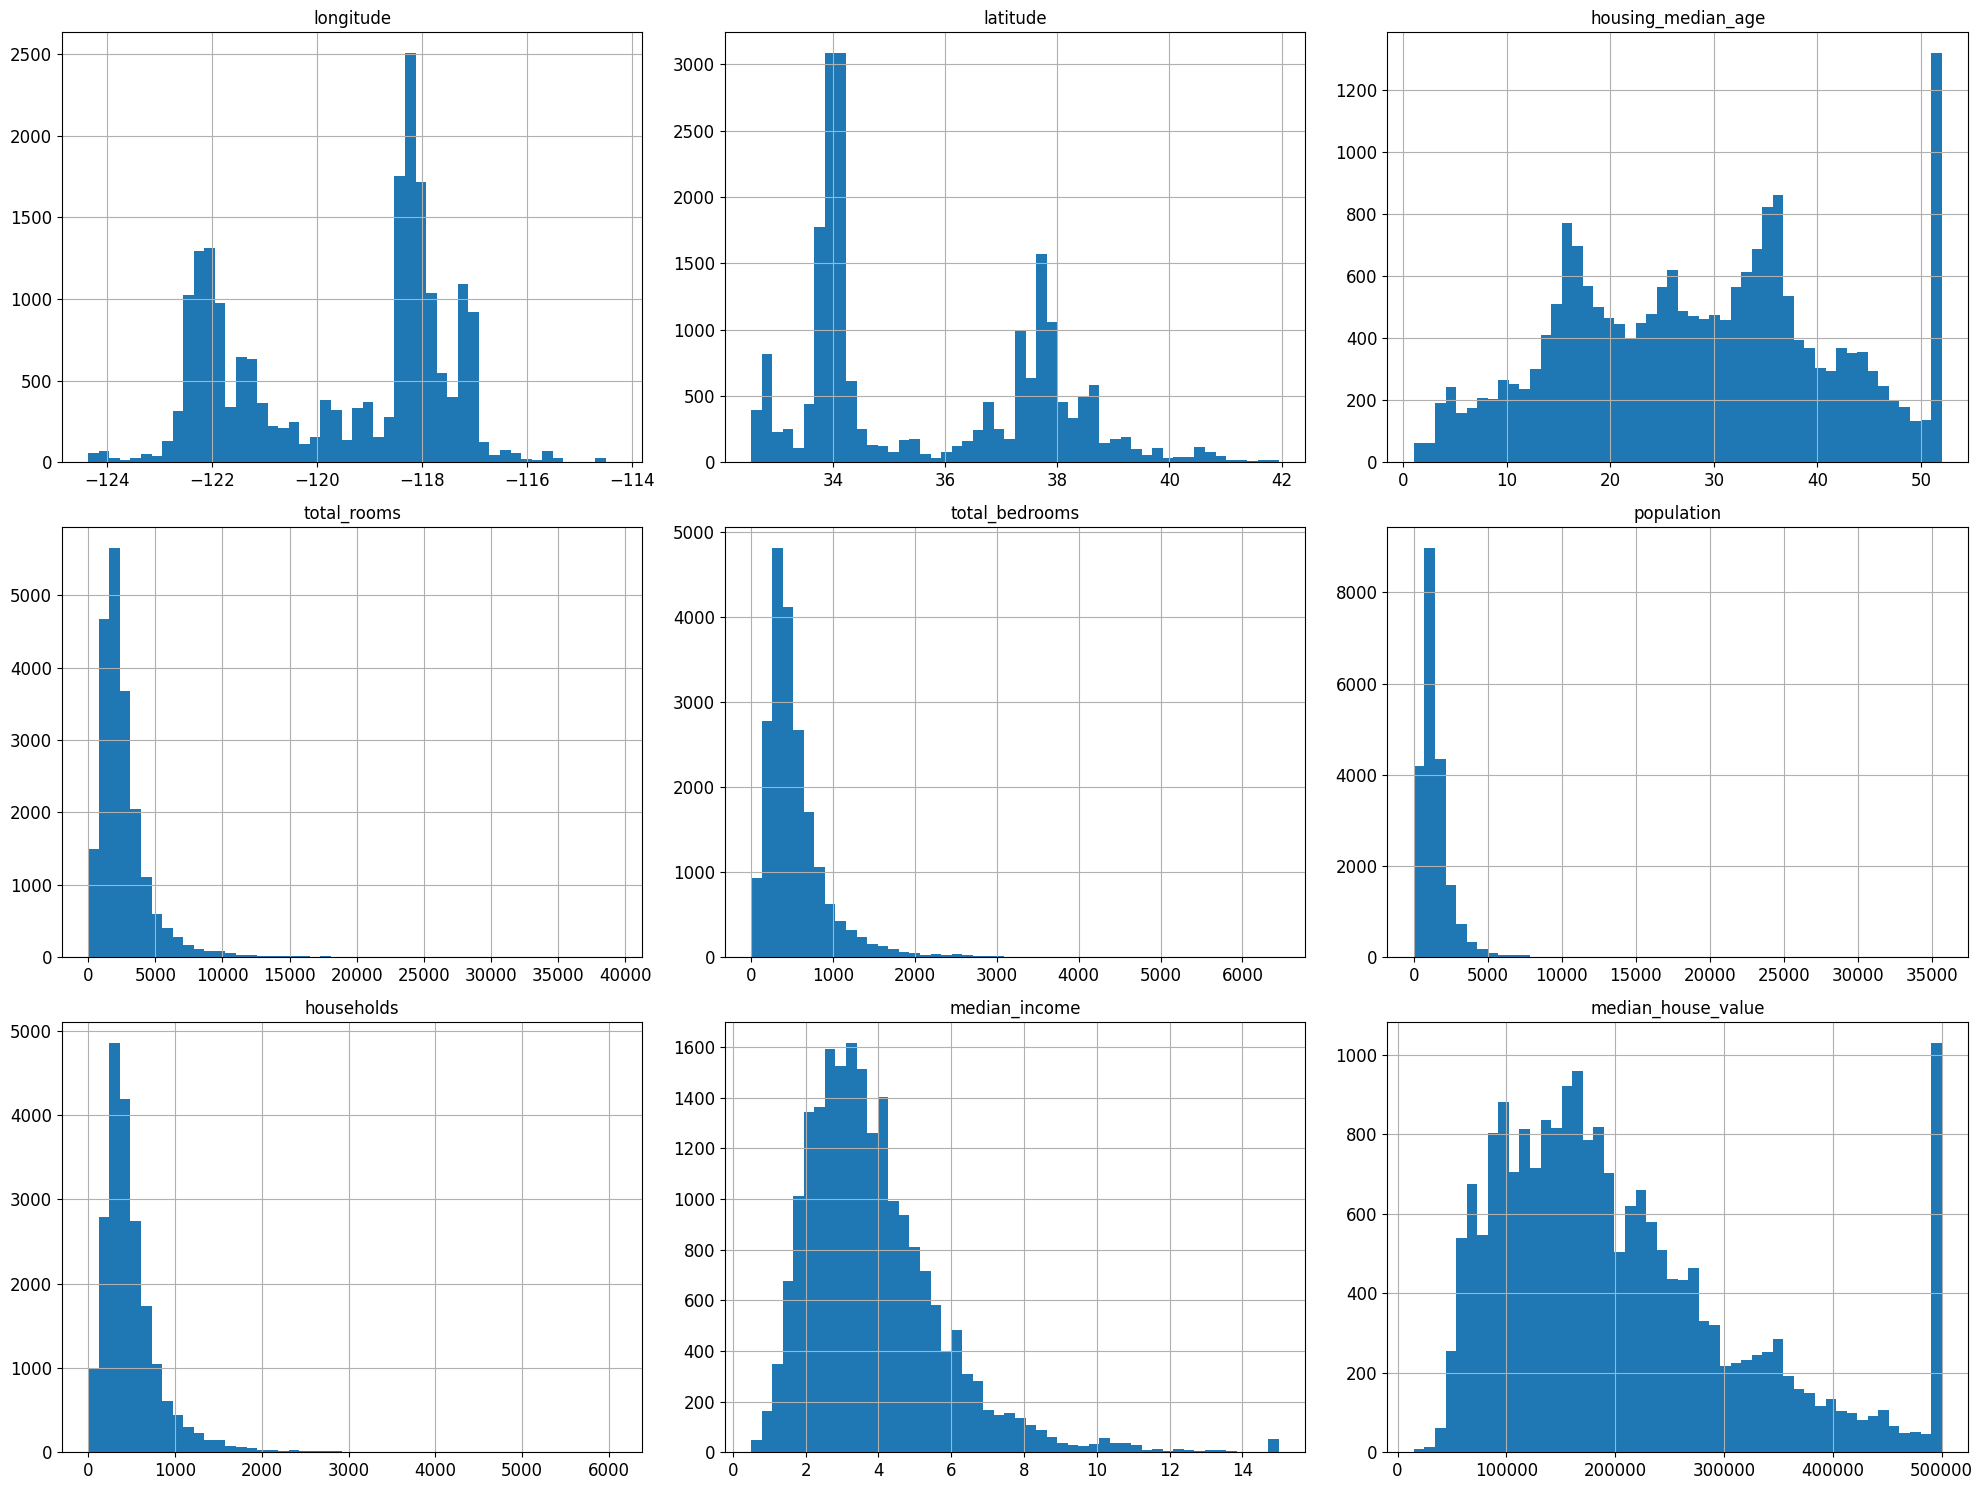

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
df_housing.hist(bins = 50, figsize = (20,15))
save_fig("attribute_histogram_plots")
plt.show()

<h2>Preprocessing 1</h2>

In [31]:
# Ensures output is identical between runs.
seed = 465
np.random.seed(seed)

In [19]:
# Use sklearn to generate a training set and a test set for our housing data.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size = 0.2, random_state = seed)

In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10443,-117.60,33.42,23.0,2482.0,461.0,1048.0,425.0,4.6650,280600.0,NEAR OCEAN
14102,-117.10,32.75,16.0,2426.0,799.0,1505.0,754.0,1.6444,103400.0,NEAR OCEAN
17334,-120.45,34.91,16.0,712.0,147.0,355.0,162.0,2.5600,150000.0,<1H OCEAN
19001,-121.92,38.34,2.0,7747.0,1133.0,3481.0,1083.0,6.1112,181000.0,INLAND
19504,-121.02,37.65,20.0,2973.0,620.0,1996.0,570.0,3.0645,106000.0,INLAND


<AxesSubplot: >

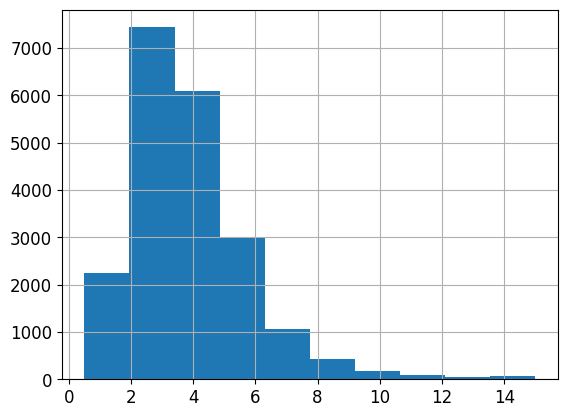

In [21]:
# Plot a histogram for the dataset's 
df_housing["median_income"].hist()

In [22]:
# Establish income categories for housing data.
df_housing["income_cat"] = pd.cut(df_housing["median_income"],
                                  bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                  labels = [1,2,3,4,5])

In [23]:
df_housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot: >

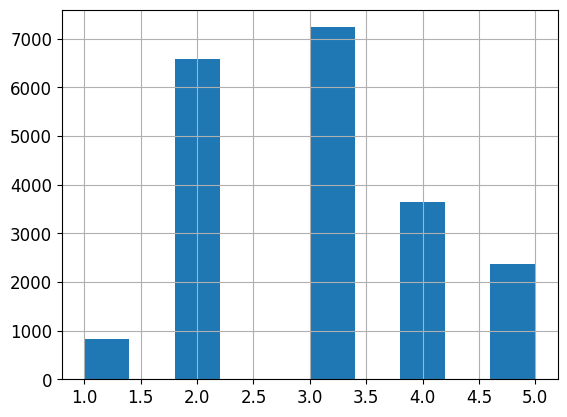

In [24]:
df_housing["income_cat"].hist()

In [25]:
# Conduct stratified sampling on income categories.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = seed)

for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [29]:
df_housing["income_cat"].value_counts() / len(df_housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [30]:
# Define a function which returns the proportions of the income categories.
def get_income_cat_proportions(df):
    try:
        return df["income_cat"].value_counts() / len(df)
    except:
        print("Could not retrieve income categories of {}".format(df))
        return None

In [32]:
train_set, test_set = train_test_split(df_housing, test_size = 0.2, random_state = seed)

compared_props = pd.DataFrame({
    "Overall" : get_income_cat_proportions(df_housing),
    "Stratified" : get_income_cat_proportions(strat_test_set),
    "Random" : get_income_cat_proportions(test_set)
}).sort_index()

In [33]:
compared_props["Rand. error"] = 100 * compared_props["Random"] / compared_props["Overall"] - 100
compared_props["Strat. error"] = 100 * compared_props["Stratified"] / compared_props["Overall"] - 100

In [34]:
compared_props

,Overall,Stratified,Random,Rand. error,Strat. error
1,0.039826,0.039971,0.041909,5.231144,0.364964
2,0.318847,0.318798,0.317103,-0.547029,-0.015195
3,0.350581,0.350533,0.347141,-0.981205,-0.013820
4,0.176308,0.176357,0.177568,0.714482,0.027480
5,0.114438,0.114341,0.116279,1.608806,-0.084674


In [35]:
# Drop unrequired field
for x in (strat_train_set, strat_test_set):
    x.drop("income_cat", axis = 1, inplace = True)

<h2>Visualization</h2>

In [37]:
# Make a copy of the training set.
df_housing = strat_train_set.copy()

Saving figure crap_visualization_plot


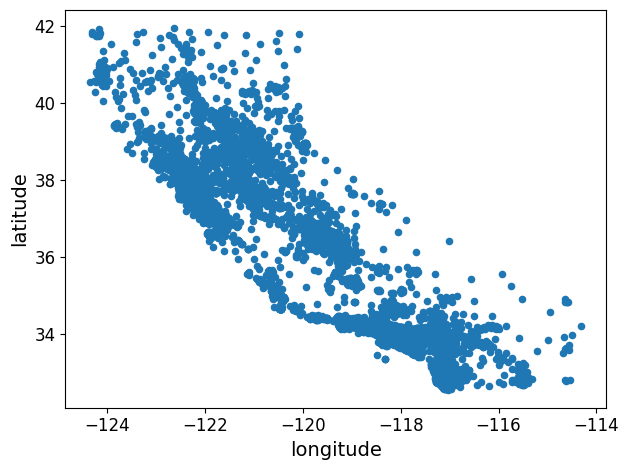

In [38]:
# Plot based on house longitude (x) and latitude (y).
# Resulting scatterplot should resemble borders of California.
df_housing.plot(kind = "scatter", x = "longitude", y = "latitude")
save_fig("crap_visualization_plot")

Saving figure better_visualization_plot


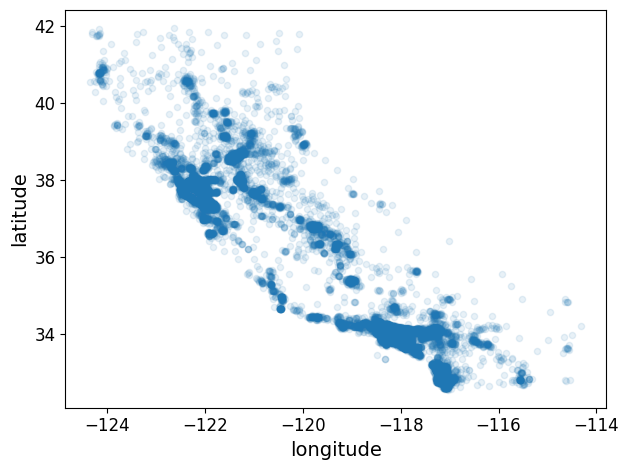

In [39]:
df_housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


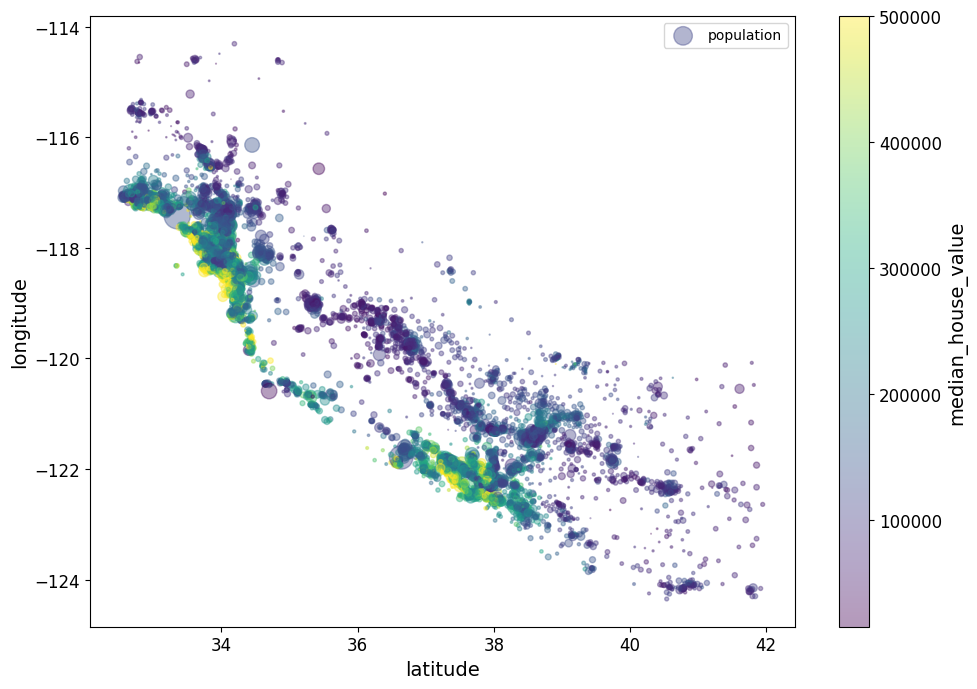

In [42]:
df_housing.plot(
    kind = "scatter", 
    x = "latitude", 
    y = "longitude", 
    alpha = 0.4,
    s = df_housing["population"] / 100,
    label = "population",
    figsize = (10,7),
    c = "median_house_value",
    cmap = plt.get_cmap("jet"),
    colorbar = True,
    sharex = False)

plt.legend()
save_fig("housing_prices_scatterplot")

In [45]:
# Download an image of California for the next plot
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\california.png', <http.client.HTTPMessage at 0x175f158c490>)

In [48]:
# We can incorporate images as underlays for our plots in mpl.
import matplotlib.image as mpimg

CA_img = mpimg.imread(os.path.join(images_path, filename))

Saving figure california_housing_prices_plot


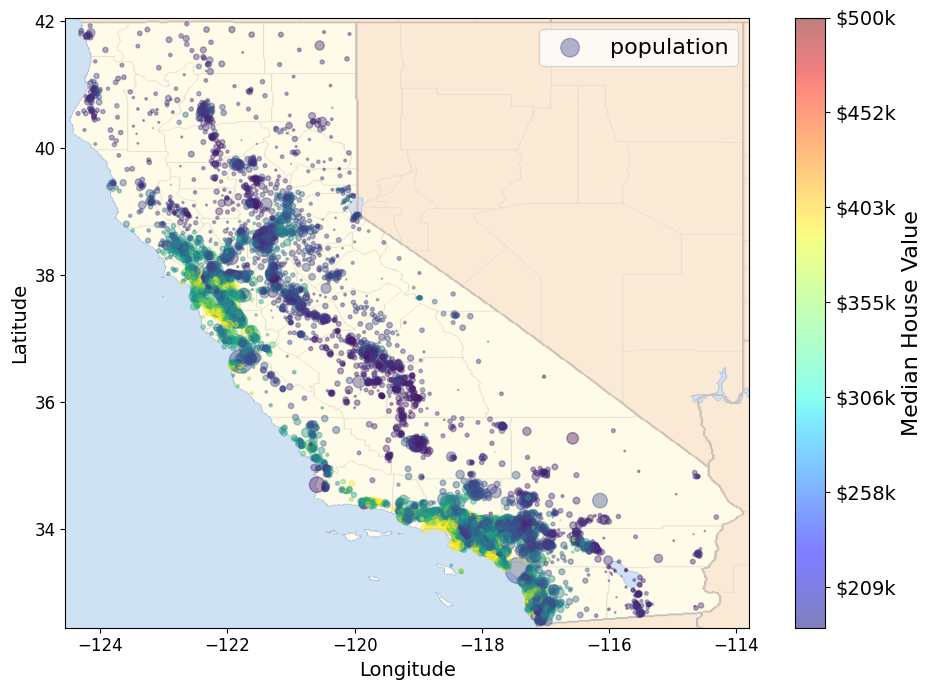

In [50]:
ax = df_housing.plot(
    kind = "scatter", 
    x = "longitude", 
    y = "latitude",
    figsize = (10,7),
    s = df_housing["population"] / 100,
    label = "population",
    c = "median_house_value",
    cmap = plt.get_cmap("jet"),
    colorbar = False,
    alpha = 0.4)

plt.imshow(
    CA_img, 
    extent = [-124.55, -113.80, 32.45, 42.05],
    alpha = 0.5,
    cmap = plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize = 14)
plt.ylabel("Latitude", fontsize = 14)

prices = df_housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks = tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

<h2>Preprocessing 2</h2>

In [51]:
df_housing = strat_train_set.drop("median_house_value", axis = 1)
df_housing_labels = strat_train_set["median_house_value"].copy()

In [52]:
# Cleaning to manage nondata (NA values).
sample_incomplete_rows = df_housing[df_housing.isnull().any(axis=1)].head()
sample_incomplete_rows
median = df_housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)

In [53]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4667,-118.29,34.05,34.0,1102.0,432.0,1325.0,439.0,1.5972,<1H OCEAN
4391,-118.27,34.07,27.0,1190.0,432.0,1795.0,422.0,1.7016,<1H OCEAN
4767,-118.37,34.03,37.0,1236.0,432.0,966.0,292.0,3.0694,<1H OCEAN
5059,-118.35,34.01,35.0,3776.0,432.0,1583.0,749.0,3.5486,<1H OCEAN
10389,-117.66,33.58,6.0,4186.0,432.0,1794.0,541.0,9.6986,<1H OCEAN


In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [55]:
housing_num = df_housing.drop("ocean_proximity", axis = 1)

In [56]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [57]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2114.    ,  432.    , 1161.    ,
        408.    ,    3.5313])

In [58]:
# Transform the training set...
X = imputer.transform(housing_num)

In [59]:
df_housing_tr = pd.DataFrame(
    X,
    columns = housing_num.columns,
    index = df_housing.index
    )

In [60]:
df_housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4667,-118.29,34.05,34.0,1102.0,432.0,1325.0,439.0,1.5972
4391,-118.27,34.07,27.0,1190.0,432.0,1795.0,422.0,1.7016
4767,-118.37,34.03,37.0,1236.0,432.0,966.0,292.0,3.0694
5059,-118.35,34.01,35.0,3776.0,432.0,1583.0,749.0,3.5486
10389,-117.66,33.58,6.0,4186.0,432.0,1794.0,541.0,9.6986


In [62]:
df_housing_cat = df_housing[["ocean_proximity"]]
df_housing_cat.head(10)

,ocean_proximity
12059,INLAND
15988,NEAR BAY
15494,NEAR OCEAN
1130,INLAND
4667,<1H OCEAN
13849,INLAND
1347,INLAND
6629,<1H OCEAN
9472,INLAND
19492,INLAND


In [63]:
# Ordinal encoding for categorical data.
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(df_housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [3.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
# Generate dummy variables for housing categories.
from sklearn.preprocessing import OneHotEncoder

# Specify that we do not want a sparse matrix as output.
encoder = OneHotEncoder(sparse_output = False)
housing_cat_one_hot = encoder.fit_transform(df_housing_cat)
housing_cat_one_hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [73]:
# Create a custome transformer to add extra fields to our data.




<h2>Training an ML Model</h2>

<h2>Adjusting an ML Model</h2>